# One Sample T-Test

			ii. One sample t test
				1) Related to mean
					a) You do this when the sample size is small < 30
					b) Population standard deviation unknown
				2) Conditions for t-test
					a) Random samples
					b) Each observation should be independent of other
						i) Sampling with replacement
						ii) If sampling without replacement, the sample size should not be more than 10% of the population
					c) Sampling distribution approximates Normal Distribution
						i) Population is Normally distributed and the population standard deviation is unknown *** AND ***
						ii) Sample size < 30


One-sample tests are appropriate when a sample is being compared to the population from a hypothesis. The population characteristics are known from theory or are calculated from the population.

https://en.wikipedia.org/wiki/Test_statistic 

One-sample t-test	
A t-test is appropriate for comparing means under relaxed conditions (less is assumed).

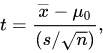

(Normal population or n large) and σ known.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power
from statsmodels.stats import weightstats

Example 1: Perfume bottle producing 150cc, 4 bottles are randomly picked and the average volume was found to be 151cc and sd of the sample bottles was 2 cc. Has mean volume changed? (95% confidence)


In [3]:
volumes = pd.Series([148.5, 153.4, 150.9, 151.2])
volumes.describe()

count      4.000000
mean     151.000000
std        2.004994
min      148.500000
25%      150.300000
50%      151.050000
75%      151.750000
max      153.400000
dtype: float64

In [5]:
pop_mean = 150
t_stat, p_value = ttest_1samp(a=volumes, popmean=pop_mean, alternative='two-sided')

In [6]:
print(f"""
The T-Statistic is: {t_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The T-Statistic is: 0.997509336107632
The p-value is: 0.3920333832606524 

Failed to reject Ho


Example2:

In [7]:
# daily intake of energy in kJ for 11 women
daily_intake = np.array([5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770])

In [8]:
# performing one sample t-test
# Ho: mean=7725

t_stat, p_value = ttest_1samp(daily_intake, popmean=7725)
print(f"""
The T-Statistic is: {t_stat}
The p-value is: {p_value}"""  )


The T-Statistic is: -2.8207540608310198
The p-value is: 0.018137235176105812


In [9]:
if p_value<0.05:
    print("Ho is rejected in favour of Ha, The avarege mean is not equal to 7725")
else:
    print("Failed to reject Ho, the avarege mean is equal to 7725")

Ho is rejected in favour of Ha, The avarege mean is not equal to 7725


### Non-Parametric Tests:


Non-Parametric tests: These tests are used for statistic that are not based on assumption of underlying distribution is
Gaussian
Outliers


Parametric Test : Non-Parametric Test

1-Sample Test	 : Wilcoxon Signed-Rank test

2-Sample test	 : Mann-Whitney U-test

Pearson Correlation : 	Spearman Correlation

ANOVA	 : Kruskal-Wallis test

##### Advantages and Limitations:

Parametric  : Test	Non-Parametric tests

Standard, Widely used	 : Some are non-standard

Based on Assumptions	 : No assumptions

Computationally faster	 : Slow/intensive

Assumptions should be tested	 : Appropriate for non-numeric data

Can be incorrect when assumptions are violated	 : Appropriate for small sample sizes

Analytically tested	 : Different results each time
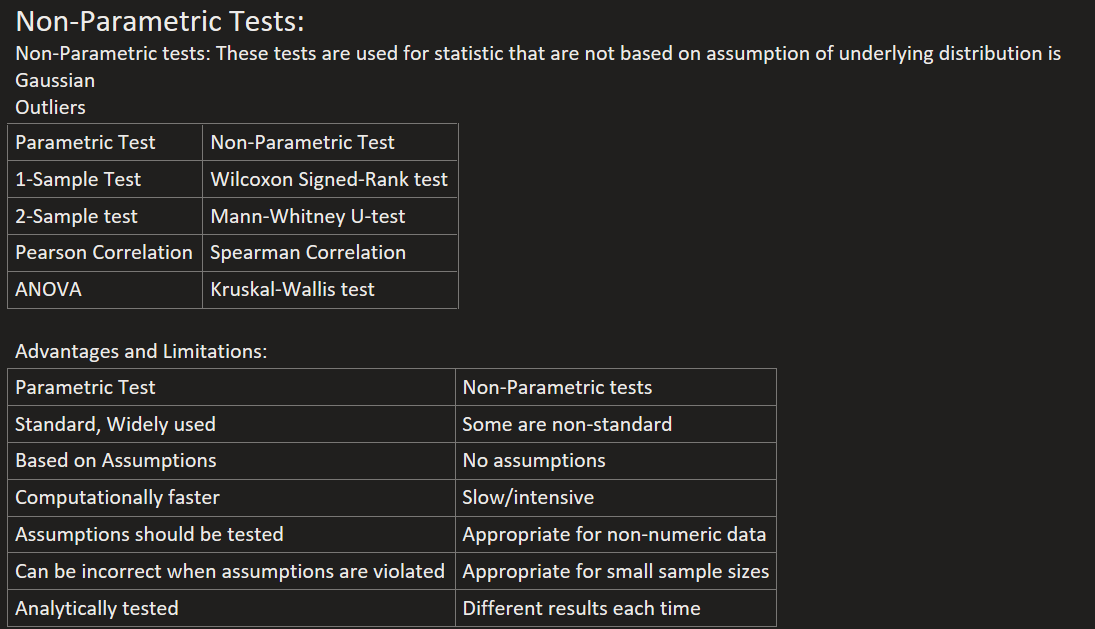

In [10]:
# performing the non-parametric test Wilcoxon-test
z_stat, p_value_w = wilcoxon(daily_intake - 7725)
print(f"""
The Z-Statistic is: {z_stat}
The p-value is: {p_value_w}"""  )


The Z-Statistic is: 8.0
The p-value is: 0.0244140625


In [11]:
if p_value_w<0.05:
    print("Ho is rejected in favour of Ha, The avarege mean is not equal to 7725")
else:
    print("Failed to reject Ho, the avarege mean is equal to 7725")

Ho is rejected in favour of Ha, The avarege mean is not equal to 7725


In [12]:
# Calculating Power of Test
# Compute the difference in Means between Population and Sample and divide it by Standard Deviation
# Set the number of Observations
# Set the alpha value and alternative values 'two-sided' , 'larger' , 'smaller'

(np.mean(daily_intake) - 7725) / np.std(daily_intake)

-0.8920007551395173

In [13]:
print(ttest_power((np.mean(daily_intake) - 7725) / np.std(daily_intake), nobs=11, alpha=0.05, alternative='two-sided'))

0.7600153548952462
